In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h3> In this project, the problem of binary classification will be solved by the  logistic regression. I will minimize the error using the gradient descent method</h3>
<h3>There is diabetes dataset. I will split the work into stages:</h3>
<ol>
<li>Loading, analyzing and visualizing data;</li>
<li>Fitting model using gradient descent method</li>
<li>Prediction and quality evaluation</li>
<li>Visualization</li>
<li>Gradient descent results</li>
<li>Fitting model using IRLS algorithm</li>
<li>IRLS results</li>
<li>Conclusions</li>
</ol>


AUC on test set: 0.86


<h2>1. Loading, analyzing and visualizing data</h2>

In [3]:
df = pd.read_csv("diabetes.csv")
data = df.drop('Outcome', axis = 1)   # Features
labels = df.drop(['Glucose', 'Insulin', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis = 1)   # Targets

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#### Pairplot

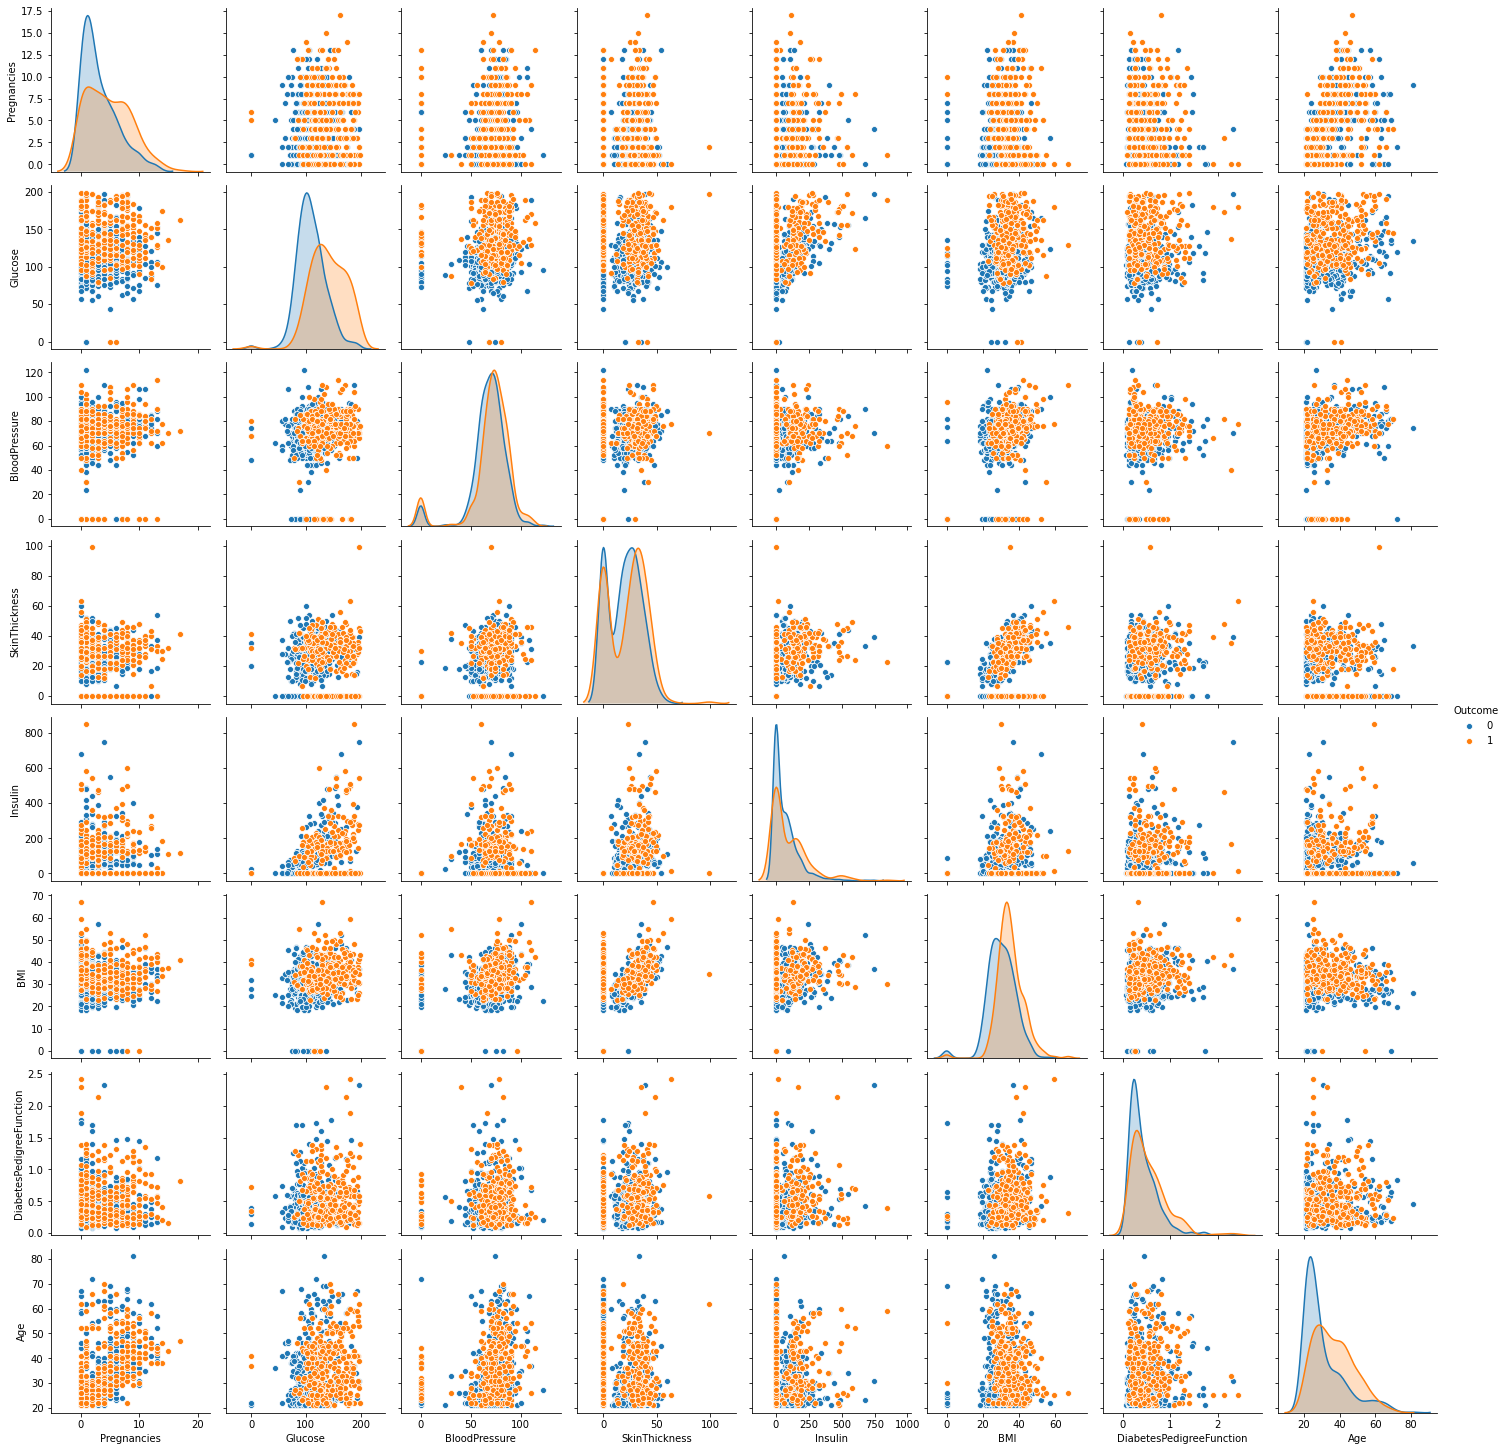

In [17]:
sns.pairplot(df, hue = 'Outcome')

#### class distribution

0    500
1    268
Name: Outcome, dtype: int64


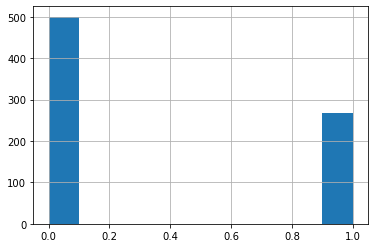

In [5]:
df['Outcome'].hist()
print(df['Outcome'].value_counts())

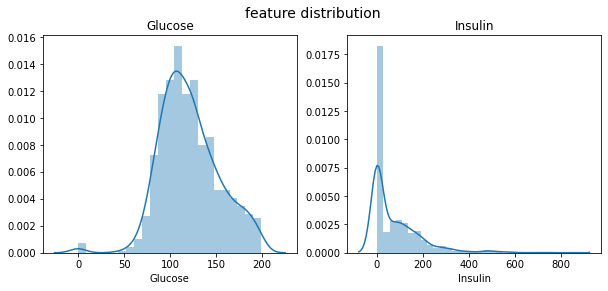

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (10,4))
fig.suptitle('feature distribution', fontsize = 14)
sns.distplot(ax = axes[0], a = df['Glucose'])
axes[0].set_title('Glucose')
sns.distplot(ax = axes[1], a = df['Insulin'])
axes[1].set_title('Insulin')
plt.show()

In [28]:
# Split data and labels down into training and testing
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.7, random_state = 1, shuffle = 'True')


In [29]:
# train and test shape
print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(537, 8) (231, 8) (537, 1) (231, 1)


In [30]:
# shape of train data
m, n = train_data.shape
print(m, n)

537 8


In [31]:
# shape of hold-out test data
m_test, n_test = test_data.shape
print(m_test, n_test)

231 8


<h2>2. Fitting model using gradient descent method</h2>

In [32]:
# Loss function
def log_loss(labels, y_pred):
    return np.sum(-labels * np.log(y_pred) - (1 - labels) * np.log(1 - y_pred), axis = 0) / len(labels)

In [33]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Coefs initial values

In [34]:
w = np.random.randn(n, 1) * 0.001
b = np.random.randn() * 0.001
w.shape

(8, 1)

In [35]:
# predict function
def predict(data):
    return sigmoid(train_data.iloc[1].dot(w) + b)

In [36]:
train_data.values[71]

array([0.00e+00, 1.39e+02, 6.20e+01, 1.70e+01, 2.10e+02, 2.21e+01,
       2.07e-01, 2.10e+01])

### fitting

In [44]:
train_losses = []
epoch_list = []
w_coefs_list = []
b_coefs_list = []
dw_list = []
db_list = []
def GD_train(X, y, step = 0.0001, epochs = 40):
    report_every = 250
    w = np.random.randn(n, 1) * 0.001
    b = np.random.randn() * 0.001
    for epoch in range(epochs):
        # prediction
        z = X.values.dot(w) + b
        a = sigmoid(z)
        # counting gradients
        dw = np.sum(X.values * (a - y.values), axis = 0) / len(X)
        db = np.sum(a - y.values, axis = 0)
        
        # gradient step
        w = w - step * dw.reshape(n,1)
        b = b - step * db
        if epoch % report_every == 0:
            train_losses.append(log_loss(y.values, a))
            w_coefs_list.append(w)
            b_coefs_list.append(b)
            epoch_list.append(epoch)
            dw_list.append(dw)
            db_list.append(db)
    return w, b   

In [45]:
%%time
GD_train(train_data, train_labels, epochs = 5000)

Wall time: 732 ms


(array([[ 5.13409455e-02],
        [ 2.57310894e-02],
        [-1.89711348e-02],
        [ 3.54483961e-05],
        [ 1.47738595e-04],
        [ 4.90313431e-02],
        [ 1.67770955e-03],
        [ 1.50447995e-02]]),
 array([-4.81798476]))

In [47]:
# Resulting coefs
coef_w = GD_train(train_data, train_labels, epochs = 5000)[0]
coef_b = GD_train(train_data, train_labels, epochs = 5000)[1]
print('Coef w = {} , Coef b = {}'.format(np.round(coef_w,3), coef_b))

Coef w = [[ 0.052]
 [ 0.026]
 [-0.019]
 [ 0.   ]
 [ 0.   ]
 [ 0.049]
 [ 0.004]
 [ 0.015]] , Coef b = [-4.81981111]


In [48]:
# prediction on training set
sigmoid_train = sigmoid(train_data.values.dot(coef_w) + coef_b)
#plt.scatter(train_data, train_labels)
print('Prediction error on the training set = ', log_loss(train_labels.values, sigmoid_train))

Prediction error on the training set =  [0.49888467]


In [49]:
# prediction on test set
sigmoid_test = sigmoid(test_data.values.dot(coef_w) + coef_b)
print('Prediction error on the test set = ', log_loss(test_labels.values, sigmoid_test))

Prediction error on the test set =  [0.49553809]


<h2> 3. Prediction and quality assessment of the algorithm</h2>

#### quality measurement function

In [50]:
# Predictions function
def diabetes_prediction(desired_sigmoid, treshold):
    prediction = np.zeros(shape = (m, 1))
    for index, elem in enumerate(desired_sigmoid):
        if elem > treshold:
            prediction[index] = 1
        elif elem < treshold:
            prediction[index] = 0
    return prediction

In [51]:
# function that determines the quality of the model at a given threshold
# Returns quality metrics (Accuracy, precision, recall) and outputs a confusion matrix
def model_quality(desired_sigmoid, train_or_test_labels, treshold):
    diabetes_pred = diabetes_prediction(desired_sigmoid, treshold)
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(train_or_test_labels)):
        if (diabetes_pred[i] == 0 and  train_or_test_labels.values[i] == 0):
            TN += 1
        if (diabetes_pred[i] == 1 and  train_or_test_labels.values[i] == 1):
            TP += 1
        if(diabetes_pred[i] == 0 and  train_or_test_labels.values[i] == 1):
            FN += 1
        if(diabetes_pred[i] == 1 and  train_or_test_labels.values[i] == 0):
            FP +=1
            
    print('TP: {}   |   FP: {}'.format(TP, FP))
    print('FN: {}   |   TN: {}'.format(FN, TN))
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = TP/(TP+FP)
    recall = TP/(TP + FN)
    return accuracy, precision, recall

#### On training set:

In [52]:
print('Accuracy: ', model_quality(sigmoid_train, train_labels, 0.4)[0])
print('Precision: ', model_quality(sigmoid_train, train_labels, 0.4)[1])
print('Recall: ', model_quality(sigmoid_train, train_labels, 0.4)[2])

TP: 116   |   FP: 68
FN: 67   |   TN: 286
Accuracy:  0.7486033519553073
TP: 116   |   FP: 68
FN: 67   |   TN: 286
Precision:  0.6304347826086957
TP: 116   |   FP: 68
FN: 67   |   TN: 286
Recall:  0.6338797814207651


#### On test set:

In [53]:
print('Accuracy: ', model_quality(sigmoid_test, test_labels, 0.4)[0])
print('Precision: ', model_quality(sigmoid_test, test_labels, 0.4)[1])
print('Recall: ', model_quality(sigmoid_test, test_labels, 0.4)[2])

TP: 54   |   FP: 20
FN: 31   |   TN: 126
Accuracy:  0.7792207792207793
TP: 54   |   FP: 20
FN: 31   |   TN: 126
Precision:  0.7297297297297297
TP: 54   |   FP: 20
FN: 31   |   TN: 126
Recall:  0.6352941176470588


### ROC-AUC curve

In [54]:
# Calculating Specificity и Sensetivity
#Specificity = TN/ (TN + FP)
#Sensetivity = TP/ (TP + FN)
def ROC(desired_sigmoid, train_or_test_labels, treshold):
    prediction = diabetes_prediction(desired_sigmoid, treshold)
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(train_or_test_labels)):
        if (prediction[i] == 0 and  train_or_test_labels.values[i] == 0):
            TN += 1
        if (prediction[i] == 1 and  train_or_test_labels.values[i] == 1):
            TP += 1
        if(prediction[i] == 0 and  train_or_test_labels.values[i] == 1):
            FN += 1
        if(prediction[i] == 1 and  train_or_test_labels.values[i] == 0):
            FP +=1
    Specificity = TN/ (TN + FP)
    Sensetivity = TP/ (TP + FN)
    return Specificity, Sensetivity

#### On training set

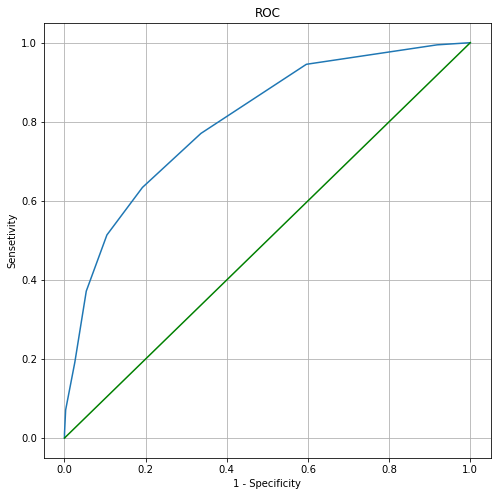

In [55]:
tresholds = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Specificity = []
Sensetivity = []
plt.figure(figsize = (8,8))
for elem in tresholds:
    Specificity.append(1 - ROC(sigmoid_train, train_labels, elem)[0])
    Sensetivity.append(ROC(sigmoid_train, train_labels, elem)[1])
plt.plot(Specificity, Sensetivity)
plt.plot([0,1], [0,1], c = 'green')
plt.title('ROC')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensetivity')
plt.grid('True')

In [56]:
# calculating AUC
# x = Specificity, y = Sensetivity
# Specificity[i] - Specificity[i + 1]
auc = 0
for i in range(0, len(Specificity) - 1):
    auc += ((Sensetivity[i + 1] + Sensetivity[i])/2) * (Specificity[i] - Specificity[i + 1])

In [57]:
print('Train AUC = ', auc)

Train AUC =  0.8019588774659627


#### On test set

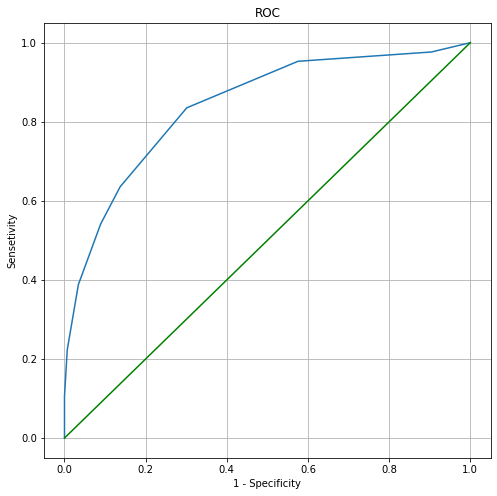

In [58]:
Specificity = []
Sensetivity = []
plt.figure(figsize = (8,8))
for elem in tresholds:
    Specificity.append(1 - ROC(sigmoid_test, test_labels, elem)[0])
    Sensetivity.append(ROC(sigmoid_test, test_labels, elem)[1])
plt.plot(Specificity, Sensetivity)
plt.plot([0,1], [0,1], c = 'green')
plt.title('ROC')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensetivity')
plt.grid('True')

In [59]:
auc = 0
for i in range(0, len(Specificity) - 1):
    auc += ((Sensetivity[i + 1] + Sensetivity[i])/2) * (Specificity[i] - Specificity[i + 1])

In [60]:
print('Test AUC = ', auc)

Test AUC =  0.8409347300564062


<h2>4. Results visualization</h2>

### dependence of precision and recall on the threshold

#### On test set

In [61]:
tresholds = np.arange(0.1, 0.9, 0.1)
precision = []
recall = []
for treshold in np.arange(0.1, 0.9, 0.1):
    precision.append(model_quality(sigmoid_test, test_labels, treshold)[1])
    recall.append(model_quality(sigmoid_test, test_labels, treshold)[2])

TP: 83   |   FP: 132
FN: 2   |   TN: 14
TP: 83   |   FP: 132
FN: 2   |   TN: 14
TP: 81   |   FP: 84
FN: 4   |   TN: 62
TP: 81   |   FP: 84
FN: 4   |   TN: 62
TP: 71   |   FP: 44
FN: 14   |   TN: 102
TP: 71   |   FP: 44
FN: 14   |   TN: 102
TP: 54   |   FP: 20
FN: 31   |   TN: 126
TP: 54   |   FP: 20
FN: 31   |   TN: 126
TP: 46   |   FP: 13
FN: 39   |   TN: 133
TP: 46   |   FP: 13
FN: 39   |   TN: 133
TP: 33   |   FP: 5
FN: 52   |   TN: 141
TP: 33   |   FP: 5
FN: 52   |   TN: 141
TP: 19   |   FP: 1
FN: 66   |   TN: 145
TP: 19   |   FP: 1
FN: 66   |   TN: 145
TP: 9   |   FP: 0
FN: 76   |   TN: 146
TP: 9   |   FP: 0
FN: 76   |   TN: 146


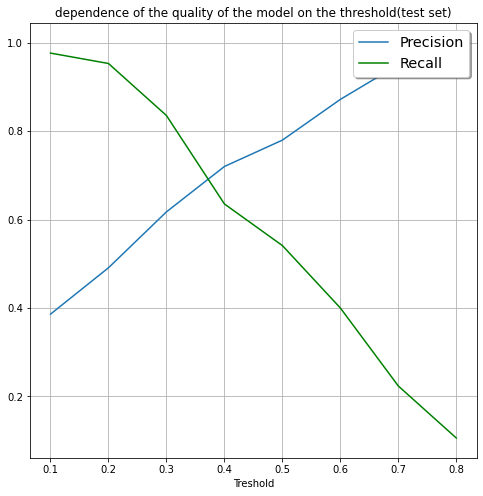

In [48]:
plt.figure(figsize = (8,8))
plt.title('dependence of the quality of the model on the threshold(test set)')
plt.plot(tresholds, precision, label = 'Precision')
plt.plot(tresholds, recall, c = 'green', label = 'Recall')
plt.xlabel('Treshold')
plt.grid('True')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')


<h2> 5. Gradient descent results:</h2>

#### On the test set, the optimal threshold = 0.35, because the task is medical and it is important to achieve more Recall
#### AUC on the test set is better than on the training set

In [62]:
print(f'AUC: {auc} | Precision: {model_quality(sigmoid_test, test_labels, 0.36)[1]} | Recall: {model_quality(sigmoid_test, test_labels, 0.35)[2]}')

TP: 59   |   FP: 26
FN: 26   |   TN: 120
TP: 60   |   FP: 31
FN: 25   |   TN: 115
AUC: 0.8409347300564062 | Precision: 0.6941176470588235 | Recall: 0.7058823529411765


<h2>6. Fitting model using IRLS algorithm</h2>

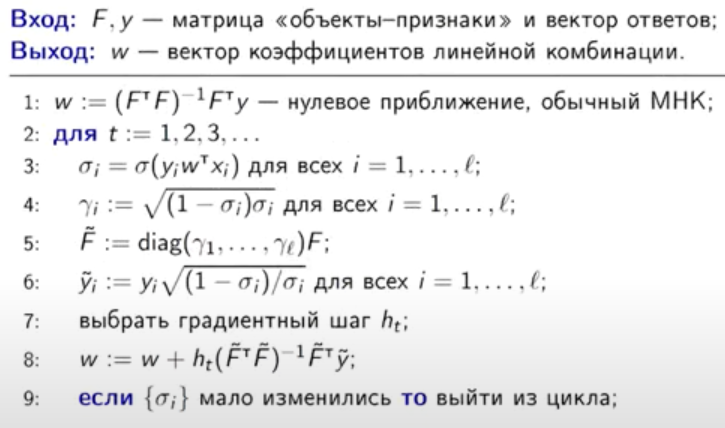

Data scaling

In [63]:
scaler = StandardScaler()
scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

IRLS

In [110]:
def IRLS(train_data, train_labels, step = 1, epochs = 20):
    # Начальная инициализация весов(обычный МНК)
    w = np.linalg.inv(train_data.T@train_data)@train_data.T@train_labels.values
    for t in range(epochs):
        sigm_list = []   # Вектор сигм
        gams = []        # Вектор гамм
        y_mod = []       # Вектор модернизированных ответов
        # Вычисляю сигмы
        for i in range(len(train_labels)):
            sigm_list.append(sigmoid(w.T@train_data[i]*train_labels.values[i][0])[0])
        
        # Вычисляю гаммы
        for j in range(len(train_labels)):
            gams.append(np.sqrt((1-sigm_list[j])/sigm_list[j]))
        
        # Матрица взвешенных объектов
        F = np.diag(gams)@train_data
    
        # Вектор модернизированных ответов
        for k in range(len(train_labels)):
            y_mod.append(train_labels.values[k][0] * np.sqrt((1 - sigm_list[k]) / sigm_list[k]))
        
        # Теперь решается задача лин.регрессии со взвешенными объектами и модернизированными ответами
        w = w + step * np.linalg.inv(F.T@F)@F.T@np.array([y_mod]).T  # Новый вектор весов
    return w

Fitting

In [111]:
%%time
w = IRLS(train_data, train_labels)

Wall time: 395 ms


In [112]:
sigmoid_train = sigmoid(train_data.dot(w))
print('Prediction error on the train set = ', log_loss(train_labels.values, sigmoid_train))

sigmoid_test = sigmoid(test_data.dot(w))
print('Prediction error on the test set = ', log_loss(test_labels.values, sigmoid_test))

Prediction error on the train set =  [0.55499409]
Prediction error on the test set =  [0.51216771]


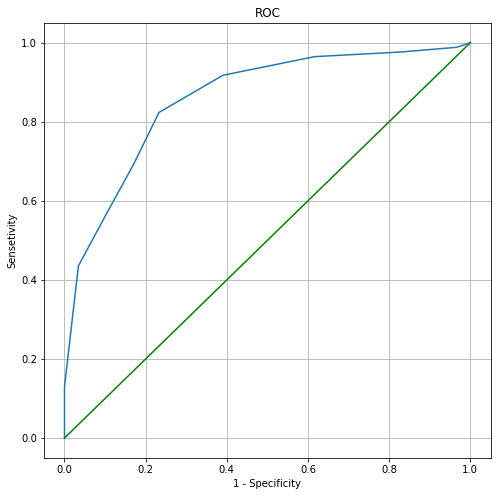

In [113]:
tresholds = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
Specificity = []
Sensetivity = []
plt.figure(figsize = (8,8))
for elem in tresholds:
    Specificity.append(1 - ROC(sigmoid_test, test_labels, elem)[0])
    Sensetivity.append(ROC(sigmoid_test, test_labels, elem)[1])
plt.plot(Specificity, Sensetivity)
plt.plot([0,1], [0,1], c = 'green')
plt.title('ROC')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensetivity')
plt.grid('True')

<h2>7. IRLS results</h2>

In [114]:
auc = 0
for i in range(0, len(Specificity) - 1):
    auc += ((Sensetivity[i + 1] + Sensetivity[i])/2) * (Specificity[i] - Specificity[i + 1])
print('AUC on test set: ', np.round(auc, 2))

AUC on test set:  0.86


<h2>Conclusions</h2>


AUC of logistic regression:
<ul>
    <li>using GD method: 0.84</li>
    <li>using IRLS method: 0.86</li>
</ul>